# [DACON / 영화 관람객 수 예측하기]

In [581]:
# ~ 데이터 전처리까지 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [582]:
# 원본 데이터 확인
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')
display(train)
display(test)
display(submission)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [583]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [584]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


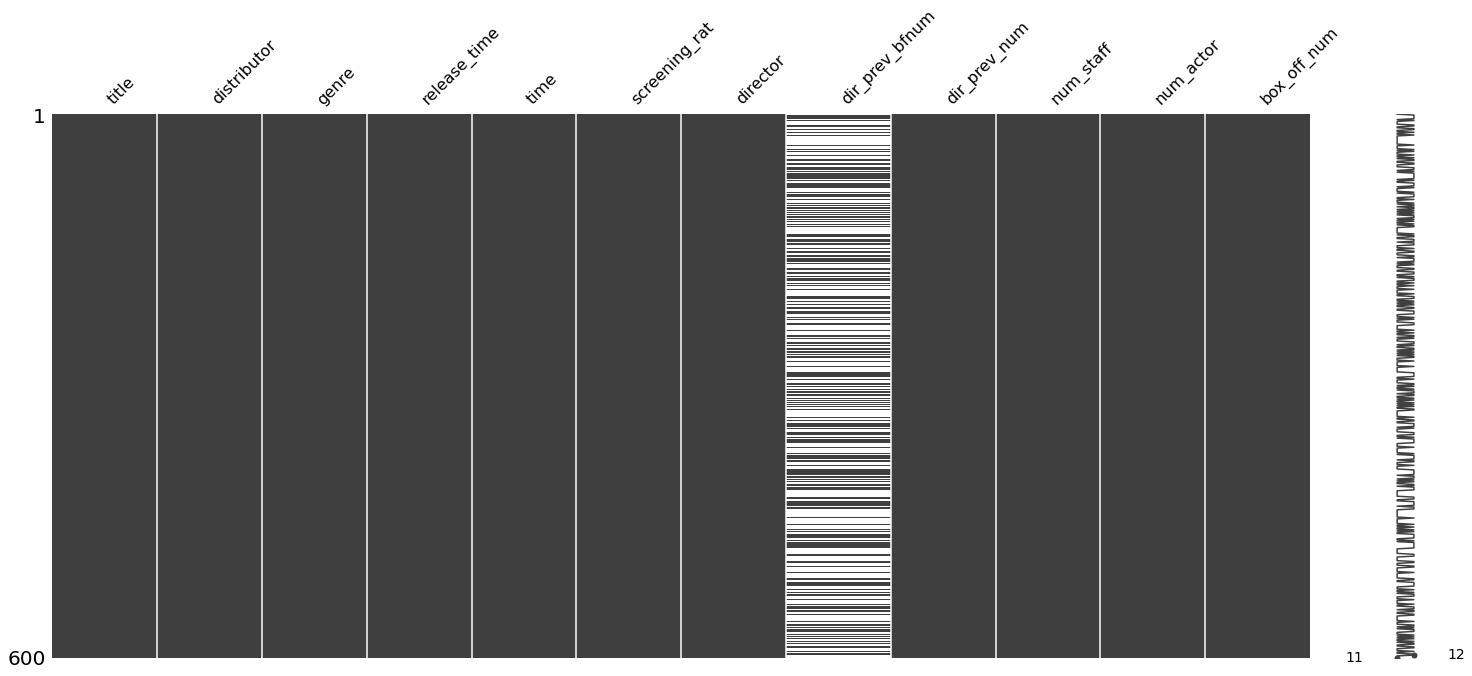

In [585]:
# 결측값 확인
import missingno as msno
msno.matrix(train)
plt.show()

In [586]:
# dir~의 결측치 개수 확인
train['dir_prev_bfnum'].isnull().sum()

330

In [587]:
# 제거할 피쳐 제거
train = train.drop(['title','director','dir_prev_bfnum','release_time'],axis=1)
display(train)
test = test.drop(['title','director','dir_prev_bfnum','release_time'],axis=1)
display(test)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1,251,2,483387
...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525


,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor
0,시네마서비스,느와르,125,청소년 관람불가,2,304,3
1,(주)쇼박스,멜로/로맨스,113,12세 관람가,4,275,3
2,CJ 엔터테인먼트,드라마,115,12세 관람가,3,419,7
3,(주)쇼박스,액션,116,15세 관람가,2,408,2
4,CJ 엔터테인먼트,공포,110,15세 관람가,1,380,1
...,...,...,...,...,...,...,...
238,디씨드,드라마,78,15세 관람가,1,4,4
239,인디스토리,다큐멘터리,86,12세 관람가,0,18,2
240,(주)컨텐츠온미디어,느와르,107,청소년 관람불가,0,224,4
241,(주)씨타마운틴픽쳐스,드라마,102,청소년 관람불가,1,68,7


In [588]:
# train, test 데이터에 범주 달아주기
train['split'] ='train'
test['split'] ='test'
data = pd.concat([train,test])
display(data)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,split
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398.0,train
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501.0,train
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083.0,train
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866.0,train
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1,251,2,483387.0,train
...,...,...,...,...,...,...,...,...,...
238,디씨드,드라마,78,15세 관람가,1,4,4,NaN,test
239,인디스토리,다큐멘터리,86,12세 관람가,0,18,2,NaN,test
240,(주)컨텐츠온미디어,느와르,107,청소년 관람불가,0,224,4,NaN,test
241,(주)씨타마운틴픽쳐스,드라마,102,청소년 관람불가,1,68,7,NaN,test


In [589]:
# 명목형 데이터 원-핫 인코딩 / distributor, genre, screening_rat

for col in ['distributor','genre','screening_rat']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data,columns=[col])

display(data)

,time,dir_prev_num,num_staff,num_actor,box_off_num,split,distributor_(유)영화사 화수분,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398.0,train,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501.0,train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083.0,train,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866.0,train,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387.0,train,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,78,1,4,4,NaN,test,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
239,86,0,18,2,NaN,test,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
240,107,0,224,4,NaN,test,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241,102,1,68,7,NaN,test,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [590]:
# train + test 데이터 모양 확인
print(data.shape)

(843, 226)


In [591]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 정규화 할 피쳐 선택 (숫자형)
scaled_cols=['time','dir_prev_num','num_staff','num_actor']
data_scaled = data.loc[:,scaled_cols]

# 정규화 적용
data_scaled = scaler.fit_transform(data_scaled)

# 정규화 적용된 데이터 데이터에 반영
data.loc[:,scaled_cols] = data_scaled[:,:]
data.head()


,time,dir_prev_num,num_staff,num_actor,box_off_num,split,distributor_(유)영화사 화수분,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,-0.108917,-0.732566,-0.379286,-0.696722,23398.0,train,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.388896,0.952435,1.417543,-0.272039,7072501.0,train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.286405,2.637436,1.150446,0.152644,6959083.0,train,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,-0.035709,0.952435,-0.810283,1.002011,217866.0,train,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.066782,0.109935,0.591973,-0.696722,483387.0,train,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [592]:
# 원핫 인코딩 했으니까 다시 분리
X_train = data[data['split']=='train']
Y_train = X_train['box_off_num']
X_train = X_train.drop(['box_off_num','split'],axis=1)
X_test = data[data['split']=='test'].drop(['box_off_num','split'],axis=1)
display(X_train.head())
display(Y_train.head())
display(X_test.head())

,time,dir_prev_num,num_staff,num_actor,distributor_(유)영화사 화수분,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,distributor_(주) 케이알씨지,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,-0.108917,-0.732566,-0.379286,-0.696722,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.388896,0.952435,1.417543,-0.272039,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.286405,2.637436,1.150446,0.152644,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,-0.035709,0.952435,-0.810283,1.002011,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.066782,0.109935,0.591973,-0.696722,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


0      23398.0
1    7072501.0
2    6959083.0
3     217866.0
4     483387.0
Name: box_off_num, dtype: float64

,time,dir_prev_num,num_staff,num_actor,distributor_(유)영화사 화수분,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,distributor_(주) 케이알씨지,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,0.315688,0.952435,0.913702,-0.272039,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.139989,2.637436,0.737661,-0.272039,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.169273,1.794936,1.611794,1.426694,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.183914,0.952435,1.545020,-0.696722,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.096065,0.109935,1.375050,-1.121406,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [593]:
# linear - 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 학습
lr.fit(X_train,Y_train)

# 예측
lr_Y_pred = lr.predict(X_test)

# csv로 저장
lr_submission = submission
submission['box_off_num'] = lr_Y_pred
submission.to_csv('lr_submission.csv',encoding="utf-8-sig")

In [ ]:
# logistic - 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# 학습
log.fit(X_train,Y_train)

# 예측
log_Y_pred = log.predict(X_test)


